In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 1 Dataanalysis
 1. Load the data and show its summary. How many samples and inputs do we have?

In [4]:
import pandas as pd
import numpy as np
link = "/content/drive/MyDrive/preparation examen/TP ML/winequality-white.csv"
df = pd.read_csv(link, header="infer", delimiter=";")
print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())


========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

========= A few first samples ========= 

   fixed acidity  volatile acidity  citric a

 2. Form the arrays X RN d of the input variables and Y RN the output. What are the
 wine qualities and the related number of samples ?

In [5]:
 X = df.drop("quality", axis=1) #we drop the column "quality"
 Y = df["quality"]
 print("\n========= Wine Qualities ========= \n")
 print(Y.value_counts())


========= Wine Qualities ========= 

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


 3. To form a binary classification problem, we group the data by quality level.

In [7]:
# bad wine (y=0) : quality <= 5 and good quality (y= 1) otherwise
Y = [0 if val <=5 else 1 for val in Y]

 4. Perform a statistical analysis (mean, variance, correlation ...) of the input variables.
 Comments on the results.

/tmp/ipython-input-503820607.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


<Axes: >

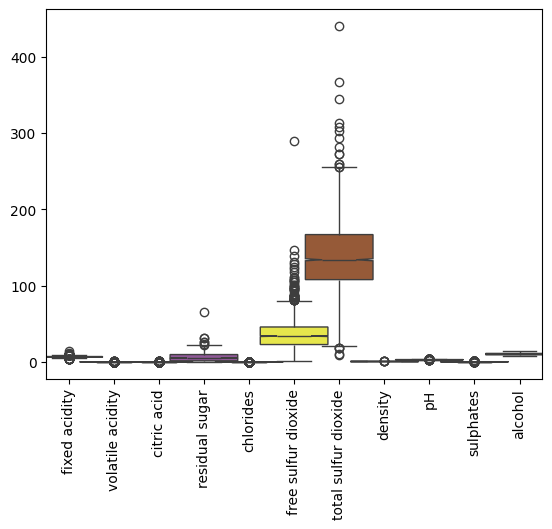

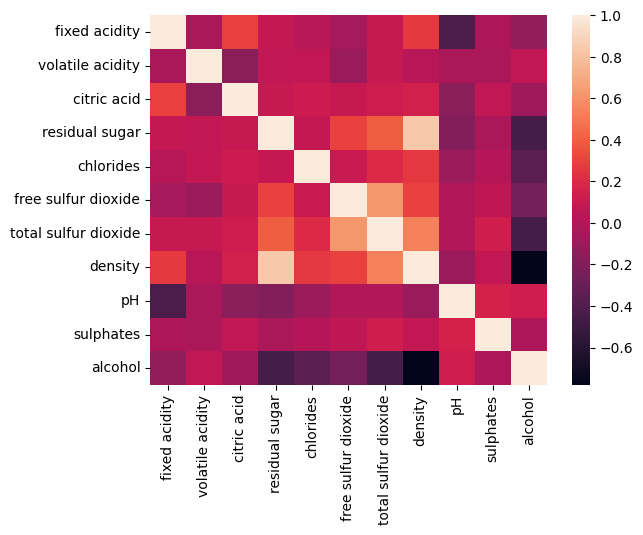

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
ax = plt.gca()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()
corr = X.corr()
sns.heatmap(corr)

 2 Classification
 2.1 Data split
 1. Randomly split-up (XY ) (keep the proportion of the labels) in three subsets Da =
 (XaYa), Dv = (Xv Yv) and Dt = (Xt Yt), respectively the training, validation and
 test set.

In [9]:
from sklearn.model_selection import train_test_split
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3,
stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5,
stratify=Ya)

2.2
 k nearest neighbor (k-NN) classification
 k-NN uses the samples in (Xa ya) as the reference data. Given any sample xi, the predicted
 label is the majority label of its k N neighbors in (Xa ya). The neighbors are the ones close to
 xi in terms of the Euclidean distance. d(xi xj)2 = xi xj 2 = (xi xj) (xi xj) xj
Da.
 1. As a starter let run k-NN with k = 3 and evaluate its performance on Dv by the error rate
 defined as
 error rate = 1
 N i D
 yi= yi
 with N, the size of set D, y and y respectively the predicted and true label.


In [12]:
 from sklearn.neighbors import KNeighborsClassifier
 # Fit the model on (Xa, Ya)
 k = 3
 clf = KNeighborsClassifier(n_neighbors = k)
 clf.fit(Xa, Ya)
  # Predict the labels of samples in Xv
 Ypred_v = clf.predict(Xv)
 # evaluate classification error rate
 from sklearn.metrics import accuracy_score
 error_v = 1-accuracy_score(Yv, Ypred_v)

2. Inspiring from that, train the k-nn classifier for different values of k
N (in the range
 [140]) and evaluate its performance either on training set and validation set. Plot the
 training and validation error curves as a function of k. From the plots, point out the over
f
 itting issue.

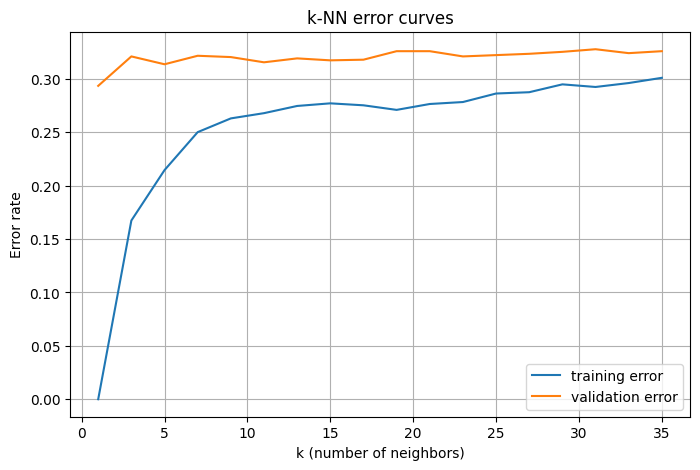

In [19]:
# some hints
k_vector = np.arange(1, 37, 2)   # define a vector of k = 1, 3, 5, ...
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):

    # fit with k
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa, Ya)

    # ---------- PREDICT TRAIN SET ----------
    Ypred_train = clf.predict(Xa)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)

    # ---------- PREDICT VALIDATION SET ----------
    Ypred_val = clf.predict(Xv)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)


# --------- PLOT TRAIN + VALIDATION ERROR CURVES ----------
plt.figure(figsize=(8,5))
plt.plot(k_vector, error_train, label="training error")
plt.plot(k_vector, error_val, label="validation error")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Error rate")
plt.title("k-NN error curves")
plt.legend()
plt.grid(True)
plt.show()

 3. How to choose the appropriate value of k ? Select the best value k of k based on the
 validation error

In [20]:
 # some hints: get the min error and related k-value
 err_min, ind_opt = error_val.min(), error_val.argmin()
 k_star = k_vector[ind_opt]


 2.3 Normalize or not normalize the data ?
 1. So far, we have used the raw inputs without any normalization. To account for different
 input scales we normalize the data by removing the mean value of each feature and scale
 it by dividing by the standard deviation. Comment and explain the following codes. Is the
 applied normalization to the validation set sound ?

In [22]:
 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler(with_mean=True, with_std=True)
 sc = sc.fit(Xa)
 Xa_n = sc.transform(Xa)
 Xv_n = sc.transform(Xv)

2. Replicate the experiments from section 2.2 with the normalized data and compare the
 achieved performances with the one of section 2.2. Drawn the conclusions ?
 3. Howto make the trained models less sensitive to the data split ?

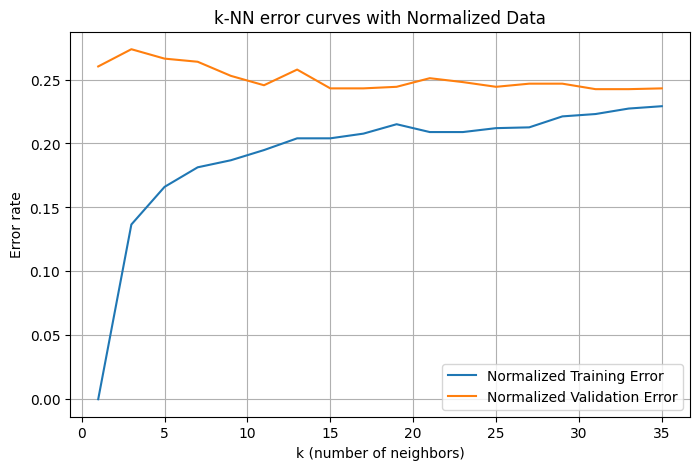

Optimal k for normalized data (k_star_n): 31
Minimum validation error for normalized data: 0.24249846907532147


In [23]:
error_train_n = np.empty(k_vector.shape)
error_val_n = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):

    # fit with k
    clf_n = KNeighborsClassifier(n_neighbors=k)
    clf_n.fit(Xa_n, Ya)

    # ---------- PREDICT TRAIN SET (NORMALIZED) ----------
    Ypred_train_n = clf_n.predict(Xa_n)
    error_train_n[ind] = 1 - accuracy_score(Ya, Ypred_train_n)

    # ---------- PREDICT VALIDATION SET (NORMALIZED) ----------
    Ypred_val_n = clf_n.predict(Xv_n)
    error_val_n[ind] = 1 - accuracy_score(Yv, Ypred_val_n)

# --------- PLOT TRAIN + VALIDATION ERROR CURVES FOR NORMALIZED DATA ----------
plt.figure(figsize=(8,5))
plt.plot(k_vector, error_train_n, label="Normalized Training Error")
plt.plot(k_vector, error_val_n, label="Normalized Validation Error")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Error rate")
plt.title("k-NN error curves with Normalized Data")
plt.legend()
plt.grid(True)
plt.show()

# Find optimal k for normalized data
err_min_n, ind_opt_n = error_val_n.min(), error_val_n.argmin()
k_star_n = k_vector[ind_opt_n]

print(f"Optimal k for normalized data (k_star_n): {k_star_n}")
print(f"Minimum validation error for normalized data: {err_min_n}")